In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:\data science\Data scientist\Projects\Project 2\loan_data.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


# Data cleaning

In [4]:
# loan ID is not required
df = df.drop('Loan_ID',axis = 1)

In [5]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df.shape

(381, 12)

In [7]:
#Checking for missing data
df.isnull().sum()

Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df[df.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Dropped all missing data
df = df.dropna()

In [10]:
df.shape

(308, 12)

In [11]:
df.duplicated().sum()

0

# EDA and Data Visualization

Text(0.5, 1.0, 'Education level of those who have applied for loan')

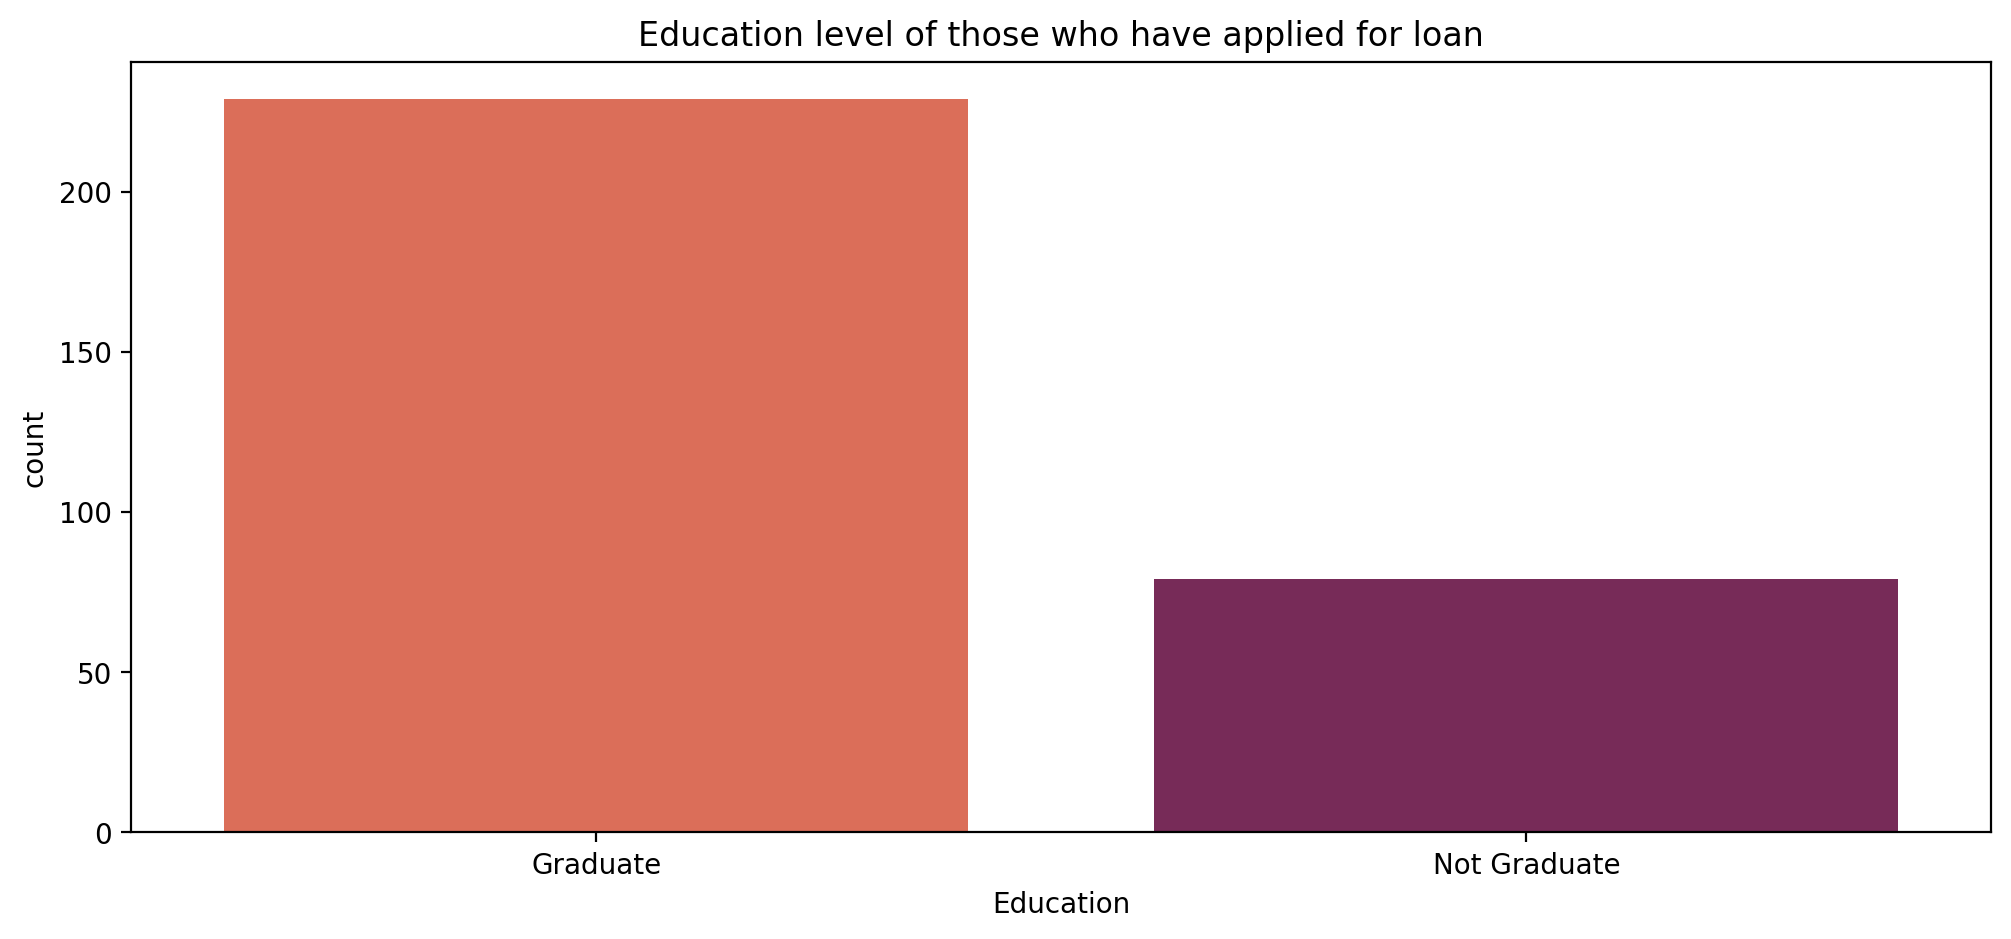

In [12]:
plt.figure(figsize = (12,5),dpi = 200)
sns.countplot(data = df,x = "Education",palette="rocket_r",)
plt.title("Education level of those who have applied for loan")

Text(0.5, 1.0, 'Gender of those who have applied for loan')

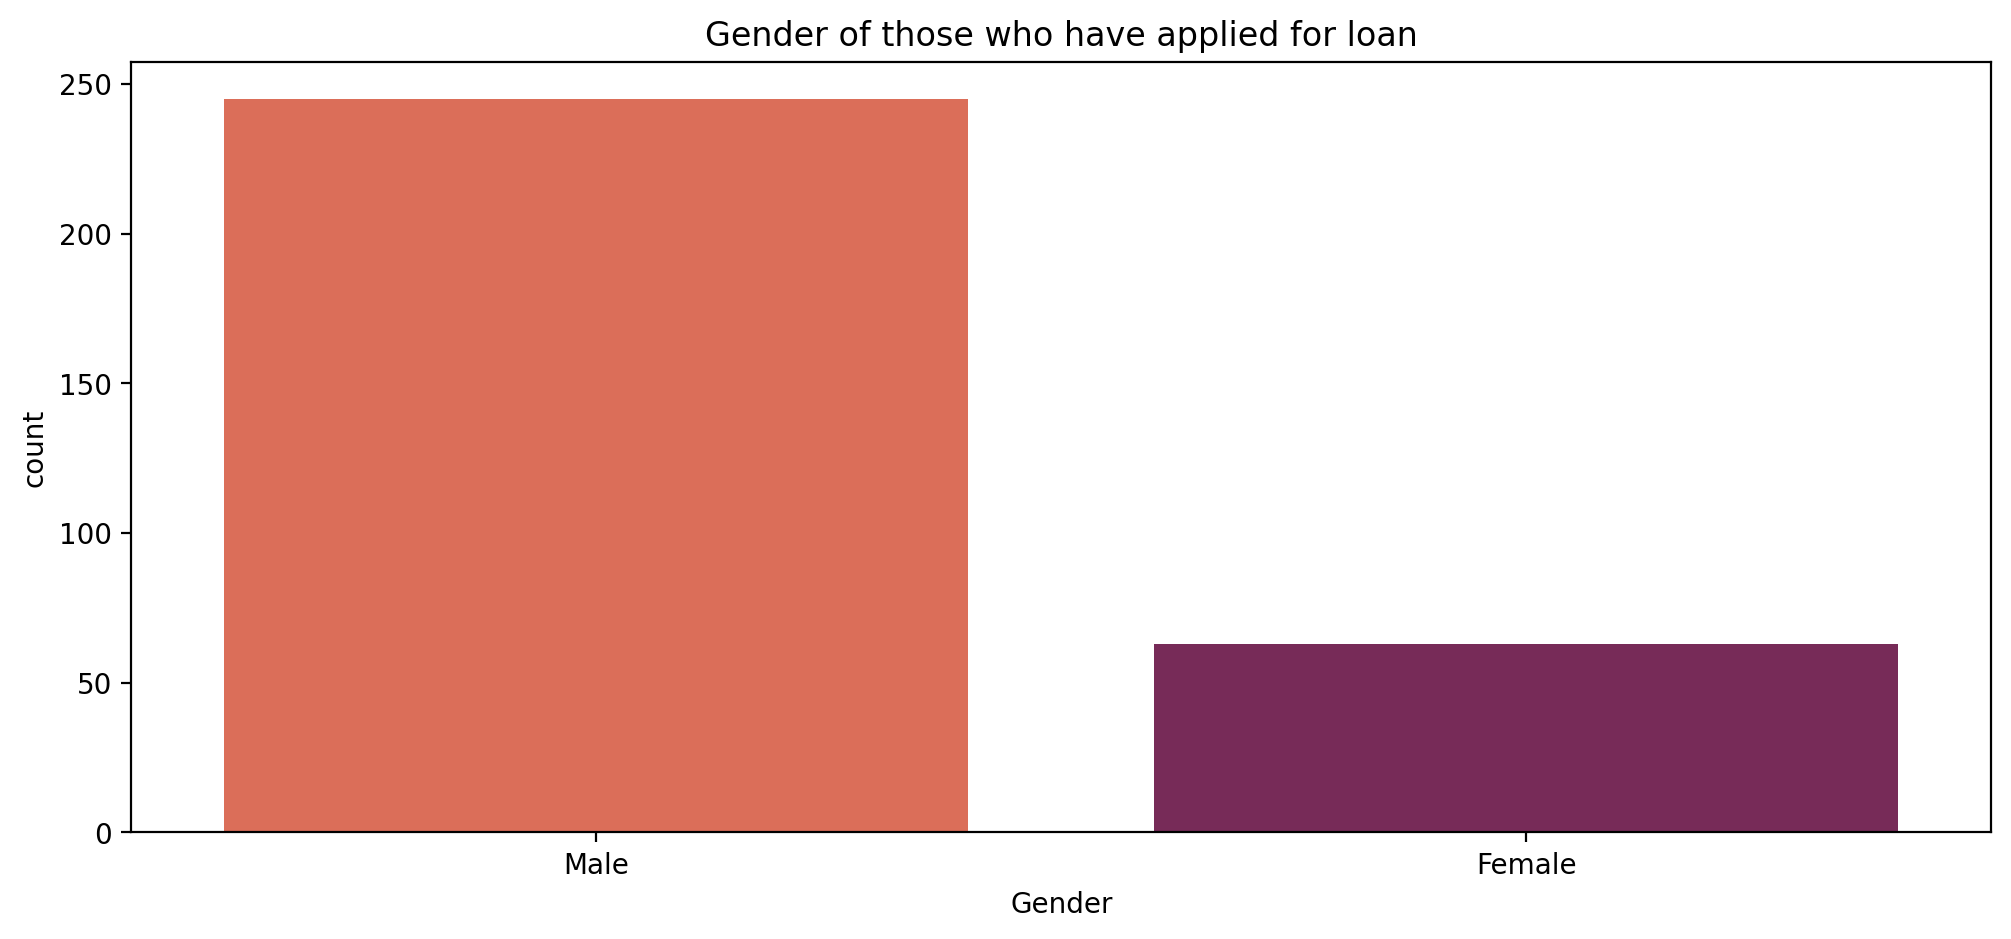

In [13]:
plt.figure(figsize = (12,5),dpi = 200)
sns.countplot(data = df,x = "Gender",palette="rocket_r",)
plt.title("Gender of those who have applied for loan")

In [14]:
df["LoanAmount"] = df["LoanAmount"]*1000

D:\program files\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


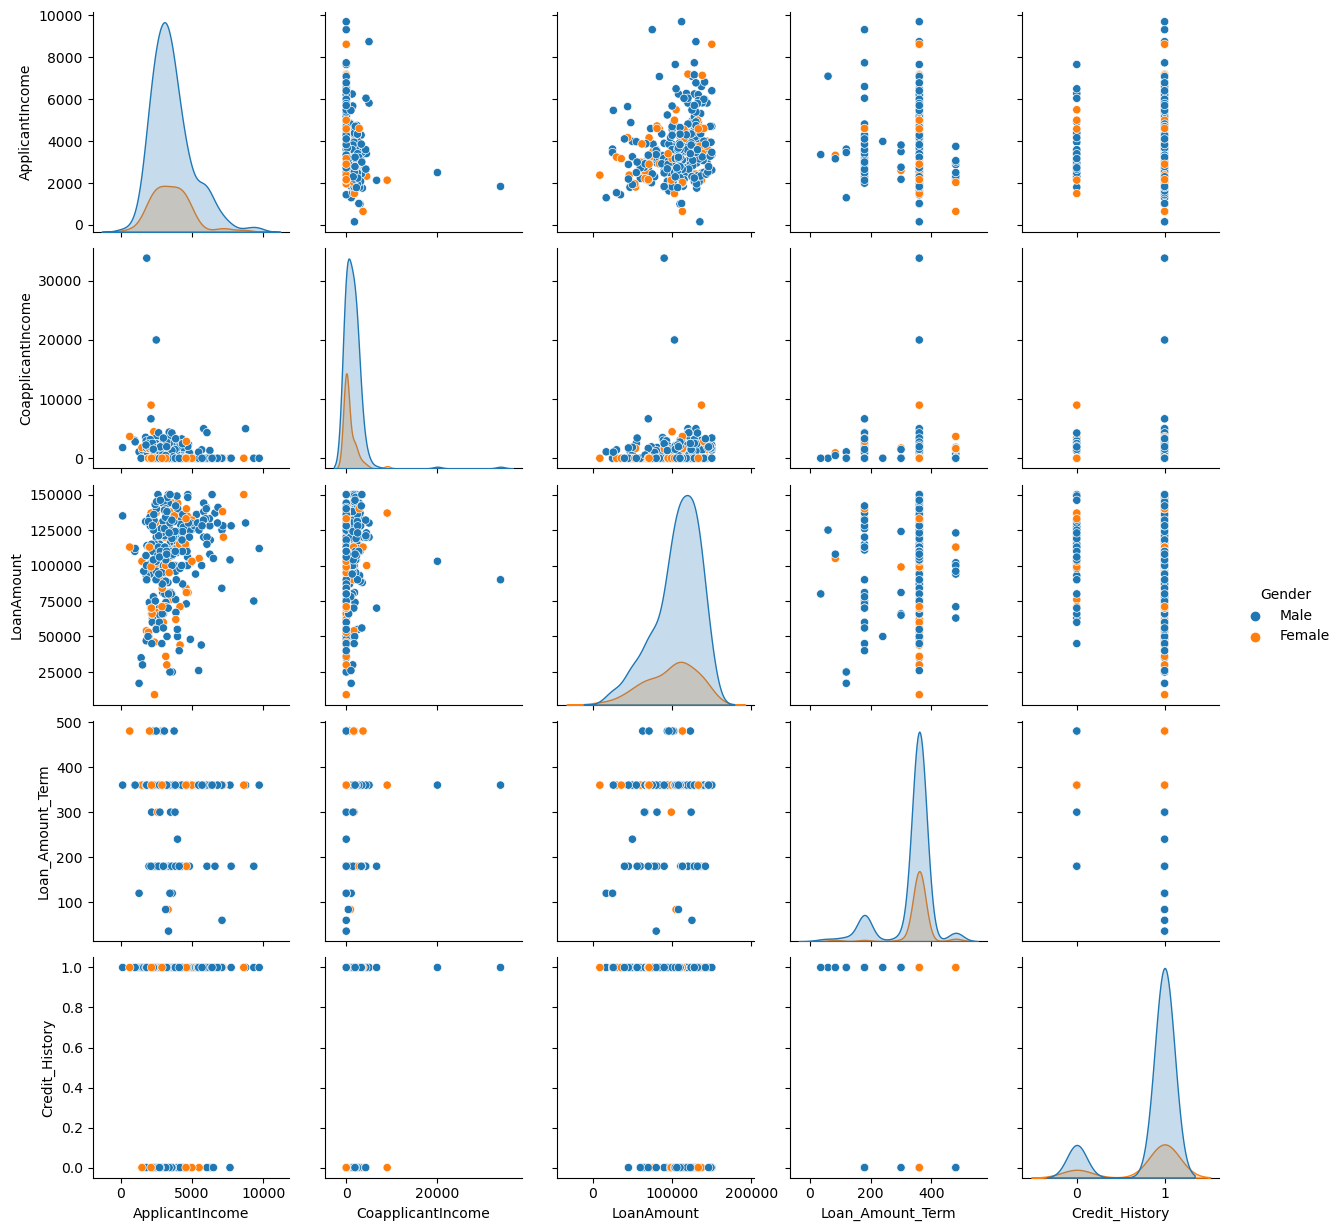

In [15]:
sns.pairplot(data = df,hue="Gender");

# Feature Engineering

In [16]:
dfcopy = df
dfcopy2 = df
dfcopy3 = df

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score

In [18]:
label = LabelEncoder()
columns = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']

for val in columns:
    df[f'encode_{val}'] = label.fit_transform(df[val])
    
df.drop(['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status'],axis = 1,inplace = True)

In [19]:
X = df.drop(['encode_Loan_Status'],axis = 1)
y = df['encode_Loan_Status']

In [21]:
#Scaling data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Model Building

### SVM

In [60]:
model_svm = SVC(kernel='rbf')
model_svm.fit(X_train_scaled,y_train)

y_pred = model_svm.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy*100,"%")
report = classification_report(y_test, y_pred,output_dict = True)
dfreport = pd.DataFrame(report).transpose()
dfreport

Accuracy: 81.72043010752688 %


,precision,recall,f1-score,support
0,0.928571,0.448276,0.604651,29.000000
1,0.797468,0.984375,0.881119,64.000000
accuracy,0.817204,0.817204,0.817204,0.817204
macro avg,0.863020,0.716325,0.742885,93.000000
weighted avg,0.838350,0.817204,0.794909,93.000000


## XGBoost

In [48]:
xgb = XGBClassifier()
xgb.fit(X_train_scaled,y_train)


y_predxgb = xgb.predict(X_test_scaled)

accuracyxgb = accuracy_score(y_test, y_predxgb)

reportxgb = classification_report(y_test, y_predxgb,output_dict = True)
print("Accuracy:", accuracyxgb*100,"%")
dfreportxg = pd.DataFrame(reportxgb).transpose()
dfreportxg

Accuracy: 74.19354838709677 %


,precision,recall,f1-score,support
0,0.600000,0.517241,0.555556,29.000000
1,0.794118,0.843750,0.818182,64.000000
accuracy,0.741935,0.741935,0.741935,0.741935
macro avg,0.697059,0.680496,0.686869,93.000000
weighted avg,0.733586,0.741935,0.736288,93.000000


## Random Forest Classifier

In [56]:
rfc = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
}

grid_search = GridSearchCV(rfc, param_grid, cv=5, error_score='raise')

grid_search.fit(X_train_scaled,y_train)

y_predrfc = grid_search.predict(X_test_scaled)

accuracyrfc = accuracy_score(y_test, y_predrfc)

print("Accuracy:", accuracyrfc*100,"%")
reportrfc = classification_report(y_test, y_predrfc,output_dict = True)
dfreportrfc = pd.DataFrame(reportrfc).transpose()
dfreportrfc

Accuracy: 80.64516129032258 %


,precision,recall,f1-score,support
0,0.789474,0.517241,0.625000,29.000000
1,0.810811,0.937500,0.869565,64.000000
accuracy,0.806452,0.806452,0.806452,0.806452
macro avg,0.800142,0.727371,0.747283,93.000000
weighted avg,0.804157,0.806452,0.793303,93.000000


In [58]:
grid_search.best_params_

{'max_depth': 20, 'n_estimators': 100}

## Result : SVM - Accuracy = 81.72% and F1 score  = 0.88